# Experimental Analysis

### Imports

In [20]:
from datasets import load_dataset 
import CodeSyntaxConcept.utils as utils
from CodeSyntaxConcept.tokenizer import CodeTokenizer
from CodeSyntaxConcept.parser import TreeSitterParser
import pandas as pd
import seaborn as sns
from statistics import mean, median, stdev


### Loading Dataframe

In [8]:
node_counts_dataframe = pd.read_csv('exploratory_experiments/ea_EleutherAI-gpt-neo-1.3B.csv')

### Statisctics 

In [9]:
node_counts_dataframe = node_counts_dataframe.drop('Unnamed: 0', axis=1)
node_counts_dataframe

,ast_element,counts
0,=,"(1, 2, 5, 0, 2, 12, 0, 1, 4, 1, 4, 2, 2, 40, 1..."
1,wildcard_import,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,nonlocal_statement,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,true,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
4,>=,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
191,continue,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
192,module,"(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
193,/=,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
194,and,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ..."


In [21]:
node_counts_dataframe['average'] = node_counts_dataframe['counts'].map(lambda counts: mean(eval(counts)))
node_counts_dataframe['median'] = node_counts_dataframe['counts'].map(lambda counts: median(eval(counts)))
node_counts_dataframe['stdev'] = node_counts_dataframe['counts'].map(lambda counts: stdev(eval(counts)))
node_counts_dataframe

,ast_element,counts,average,median,stdev
0,=,"(1, 2, 5, 0, 2, 12, 0, 1, 4, 1, 4, 2, 2, 40, 1...",6.7793,4.0,10.870483
1,wildcard_import,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0000,0.0,0.000000
2,nonlocal_statement,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0001,0.0,0.010000
3,true,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0.3141,0.0,1.097343
4,>=,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0466,0.0,0.488930
...,...,...,...,...,...
191,continue,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0625,0.0,0.395233
192,module,"(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1.0000,1.0,0.000000
193,/=,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0046,0.0,0.090441
194,and,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...",0.2341,0.0,0.863581


### Visualization

<AxesSubplot: title={'center': 'Top 30 More Frequent AST Types'}, xlabel='ast_element'>

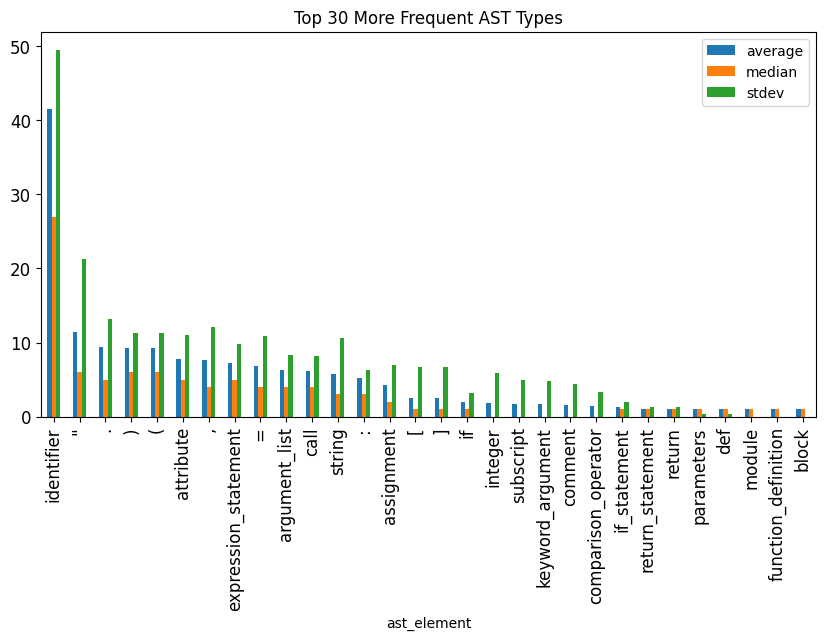

In [23]:
top_10 = node_counts_dataframe.sort_values(by=['average'], ascending=False).head(30)
top_10.plot(x='ast_element',kind='bar',fontsize=12, title='Top 30 More Frequent AST Types', figsize=(10,5))

<AxesSubplot: title={'center': 'Top 30 Less Frequent Concepts'}, xlabel='ast_element'>

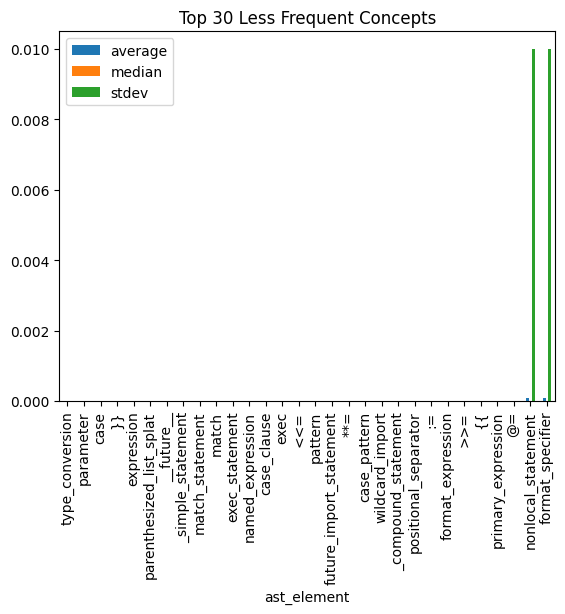

In [25]:
bottom_30 = node_counts_dataframe.sort_values(by=['average'], ascending=True).head(30)
bottom_30.plot(x='ast_element',kind='bar', title='Top 30 Less Frequent Concepts')